In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
df = pd.read_csv('voice.csv')

In [3]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

### Encoding Labels

In [5]:
label_encoder = LabelEncoder()

df['label'] = label_encoder.fit_transform(df['label'])

In [6]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

In [7]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


### Splitting and Scaling

In [8]:
y = df['label'].copy()
X = df.drop('label', axis=1).copy()

In [9]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### Modeling and Training

In [11]:
X.shape

(3168, 20)

In [12]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5569 (21.75 KB)
Trainable params: 5569 (21.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 4s 22ms/step - loss: 0.3892 - accuracy: 0.8641 - auc: 0.9409 - val_loss: 0.1911 - val_accuracy: 0.9572 - val_auc: 0.9909
Epoch 2/100
56/56 [==============================] - 0s 7ms/step - loss: 0.1379 - accuracy: 0.9611 - auc: 0.9925 - val_loss: 0.0894 - val_accuracy: 0.9775 - val_auc: 0.9967
Epoch 3/100
56/56 [==============================] - 0s 7ms/step - loss: 0.0854 - accuracy: 0.9763 - auc: 0.9958 - val_loss: 0.0654 - val_accuracy: 0.9797 - val_auc: 0.9975
Epoch 4/100
56/56 [==============================] - 0s 7ms/step - loss: 0.0721 - accuracy: 0.9780 - auc: 0.9968 - val_loss: 0.0600 - val_accuracy: 0.9865 - val_auc: 0.9973
Epoch 5/100
56/56 [==============================] - 0s 7ms/step - loss: 0.0659 - accuracy: 0.9786 - auc: 0.9963 - val_loss: 0.0607 - val_accuracy: 0.9797 - val_auc: 0.9973
Epoch 6/100
56/56 [==============================] - 0s 6ms/step - loss: 0.0613 - accuracy: 0.9808 - auc: 0.9967 - val_loss: 0.0536 - 

In [15]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9800 - auc: 0.9976


[0.06179770827293396, 0.980021059513092, 0.9975925087928772]

### Using 2D CNNs

In [16]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


In [17]:
X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [18]:
X.shape

(3168, 20)

In [19]:
tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=25, padding='post')

array([[-4,  0, -4, ...,  0,  0,  0],
       [-3,  0, -3, ...,  0,  0,  0],
       [-3,  1, -4, ...,  0,  0,  0],
       ...,
       [-1,  2,  0, ...,  0,  0,  0],
       [-1,  2,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0]])

In [20]:
tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=25, padding='post').shape

(3168, 25)

In [21]:
pd.DataFrame(tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=25, padding='post'))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-4,0,-4,-2,-5,0,2,1,0,0,...,-1,0,-1,-1,-1,0,0,0,0,0
1,-3,0,-3,-2,-5,0,4,4,0,0,...,-1,0,-1,-1,-1,0,0,0,0,0
2,-3,1,-4,-2,-3,0,6,7,-1,0,...,-1,0,-1,-1,-1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,-1,0,-1,-1,0,0,0,0,0,0
4,-1,1,-1,-1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1,1,0,-1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3164,-2,1,-2,-2,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3165,-1,2,0,-2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3166,-1,2,0,-1,0,2,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [22]:
pd.DataFrame(tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float64,  maxlen=25, padding='post'))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,0.0,0.0,0.0,0.0,0.0
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,0.0,0.0,0.0,0.0,0.0
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,0.0,0.0,0.0,0.0,0.0
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,0.0,0.0,0.0,0.0,0.0
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-0.221660,-0.708404,0.124154,0.136933,0.289046,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,0.0,0.0,0.0,0.0,0.0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,0.153573,-0.214641,-0.388453,-0.384717,0.871981,0.0,0.0,0.0,0.0,0.0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,0.0,0.0,0.0,0.0,0.0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,0.0,0.0,0.0,0.0,0.0


In [23]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float64,  maxlen=25, padding='post')

In [24]:
X

array([[-4.04924806,  0.4273553 , -4.22490077, ...,  0.        ,
         0.        ,  0.        ],
       [-3.84105325,  0.6116695 , -3.99929342, ...,  0.        ,
         0.        ,  0.        ],
       [-3.46306647,  1.60384791, -4.09585052, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2452018 ,  2.012196  , -0.01772849, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51474626,  2.14765111, -0.07087873, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
X.reshape(-1, 5, 5)

array([[[-4.04924806,  0.4273553 , -4.22490077, -2.57610164,
         -5.69360723],
        [-0.21477826,  2.29330585,  1.76294635, -0.03908279,
          0.4715753 ],
        [-2.14121031, -4.04924806, -1.81203825, -1.0979981 ,
          0.56595854],
        [-1.5642046 , -0.70840431, -1.43142165, -1.41913712,
         -1.45477229],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[-3.84105325,  0.6116695 , -3.99929342, -2.48688452,
         -5.58898726],
        [-0.25848536,  4.54805598,  4.43300778, -0.06523603,
          0.59443122],
        [-2.14121031, -3.84105325, -1.07959443, -1.09153262,
         -0.29403034],
        [-1.56191576, -0.70840431, -1.41810716, -1.4058184 ,
         -1.01410294],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[-3.46306647,  1.60384791, -4.09585052, -2.7069865 ,
         -3.92869875],
        [ 0.90932569,  6.51365636,  7.32620677, -1.08373029,
          0

In [26]:
X.reshape(-1, 5, 5).shape

(3168, 5, 5)

In [27]:
X = X.reshape(-1, 5, 5)

In [29]:
X.shape

(3168, 5, 5)

In [30]:
X = np.expand_dims(X, axis=3)

In [31]:
X.shape

(3168, 5, 5, 1)

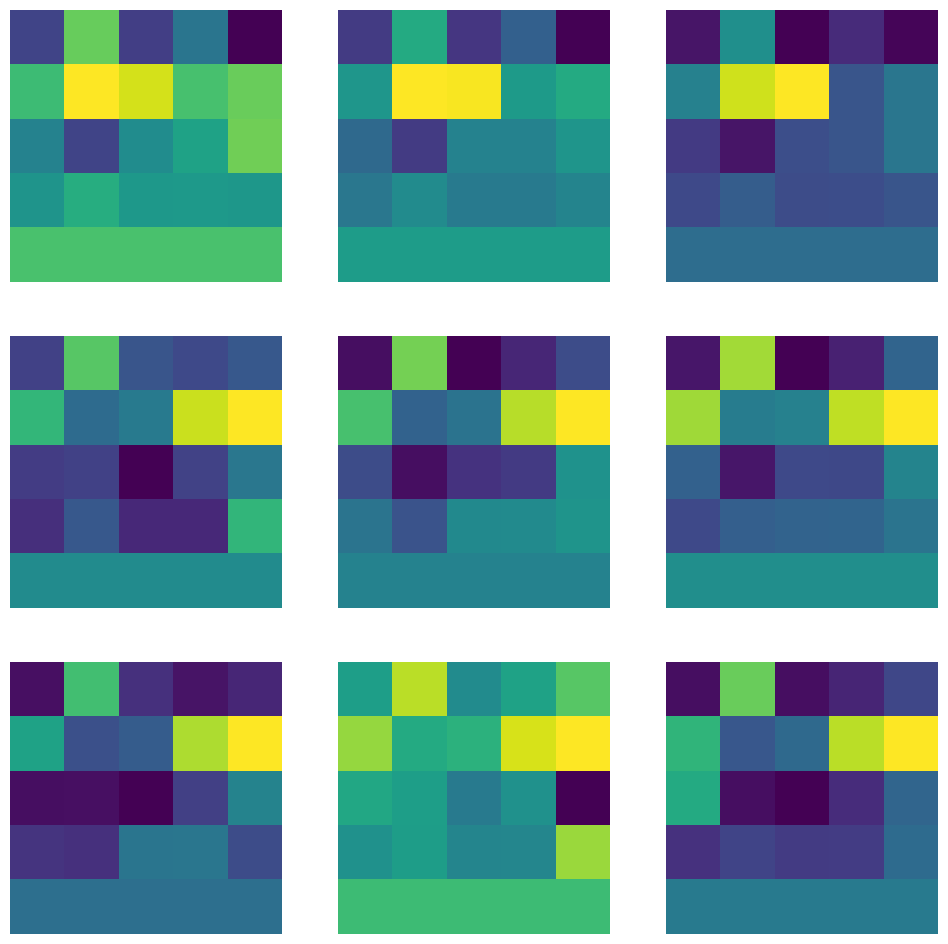

In [32]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(X[i]))
    plt.axis('off')

plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [34]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32)                0   

In [36]:
 model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 4s 18ms/step - loss: 0.6433 - accuracy: 0.6791 - auc: 0.7589 - val_loss: 0.5973 - val_accuracy: 0.7162 - val_auc: 0.8155
Epoch 2/100
56/56 [==============================] - 0s 7ms/step - loss: 0.5215 - accuracy: 0.7919 - auc: 0.8709 - val_loss: 0.4669 - val_accuracy: 0.7950 - val_auc: 0.8915
Epoch 3/100
56/56 [==============================] - 0s 7ms/step - loss: 0.3986 - accuracy: 0.8601 - auc: 0.9267 - val_loss: 0.3540 - val_accuracy: 0.8761 - val_auc: 0.9488
Epoch 4/100
56/56 [==============================] - 0s 7ms/step - loss: 0.3004 - accuracy: 0.9013 - auc: 0.9567 - val_loss: 0.2880 - val_accuracy: 0.8806 - val_auc: 0.9577
Epoch 5/100
56/56 [==============================] - 0s 7ms/step - loss: 0.2490 - accuracy: 0.9092 - auc: 0.9661 - val_loss: 0.2403 - val_accuracy: 0.9212 - val_auc: 0.9708
Epoch 6/100
56/56 [==============================] - 0s 7ms/step - loss: 0.2083 - accuracy: 0.9227 - auc: 0.9767 - val_loss: 0.2153 - 

In [37]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9621 - auc: 0.9933


[0.10054304450750351, 0.9621450901031494, 0.993309736251831]